In [1]:
from data.sp_data import SPData
from models import SPCplex, SPQuboBinary
from models import SPQuboBinaryBG
from evaluation.evaluation import SPEvaluation
from plotting.sp_plot import SPPlot

import networkx as nx

import neal

from run_processor import do_optimization
from datetime import datetime


(answer_merge.solution) = {'x_193.0_0.0_2.5_0_-10': np.int8(0), 'x_83.0_0.0_2.5_0_-10': np.int8(0), 'x_142.0_0.0_2.5_0_-10': np.int8(0), 'x_106.0_0.0_2.5_0_-10': np.int8(0), 'x_80.0_0.0_2.5_0_-10': np.int8(0), 'x_180.0_0.0_2.5_0_-10': np.int8(0), 'x_36.0_0.0_2.5_0_-10': np.int8(1), 'x_120.0_0.0_2.5_0_-10': np.int8(0), 'x_196.0_0.0_2.5_0_-10': np.int8(0), 'x_158.0_0.0_2.5_0_-10': np.int8(0), 'x_160.0_0.0_2.5_0_-10': np.int8(1), 'x_50.0_0.0_2.5_0_-10': np.int8(0), 'x_14.0_0.0_2.5_0_-10': np.int8(0), 'x_73.0_0.0_2.5_0_-10': np.int8(0), 'x_81.0_0.0_2.5_0_-10': np.int8(1), 'x_98.0_0.0_2.5_0_-10': np.int8(0), 'x_157.0_0.0_2.5_0_-10': np.int8(1), 'x_17.0_0.0_2.5_0_-10': np.int8(0), 'x_32.0_0.0_2.5_0_-10': np.int8(1), 'x_123.0_0.0_2.5_0_-10': np.int8(0), 'x_65.0_0.0_2.5_0_-10': np.int8(0), 'x_161.0_0.0_2.5_0_-10': np.int8(0), 'x_53.0_0.0_2.5_0_-10': np.int8(1), 'x_27.0_0.0_2.5_0_-10': np.int8(0), 'x_35.0_0.0_2.5_0_-10': np.int8(0), 'x_86.0_0.0_2.5_0_-10': np.int8(1), 'x_155.0_0.0_2.5_0_-10': n

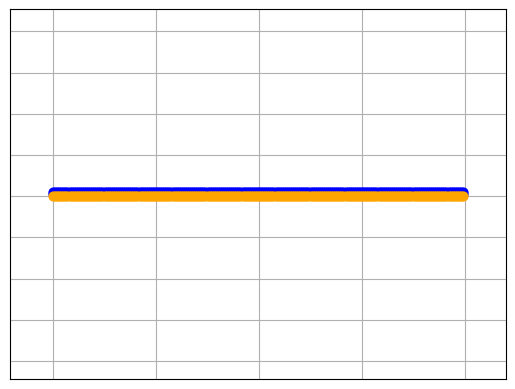

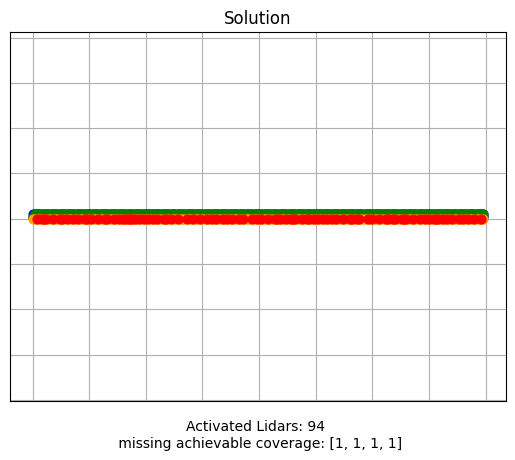

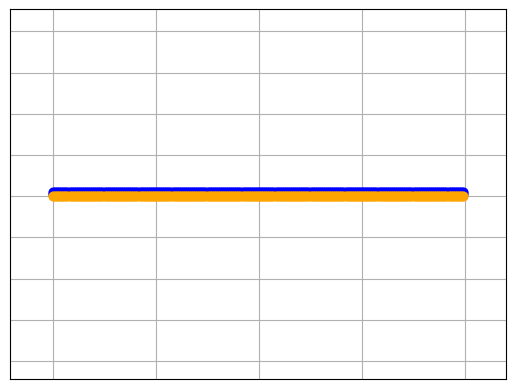

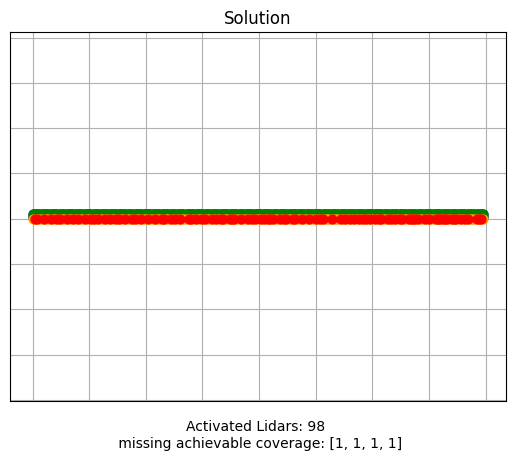

In [ ]:
# params = {"lidar_density": 0.5, "street_point_density": 0.5}
# data = SPData().create_problem_from_glb_file(**params)

params = {"version": 2, "num_cols": 200, "rad_max": 2.4}
data = SPData().gen_problem(**params) 

timestamp_str = datetime.now().strftime("%Y%m%d_%H%M%S")
fig = SPPlot(data).plot_problem()
fig.savefig(f"output/{timestamp_str}_problem.png")

for i in [1]:range(2):
    timestamp_str = datetime.now().strftime("%Y%m%d_%H%M%S")
    if i == 0:
        explanation = "simulator without cut"
        # 500read
        # 1000sweep
    elif i == 1:
        explanation = "simulator with cut"
        # 500read
        # 1000sweep
    
    if explanation == "simulator without cut":
        # config = {}
        # solve_func = do_optimization
        # qubo_model_bin = SPQuboBinaryBG(data)
        config = {"num_reads":1000,"num_sweeps":1000}
        solve_func = neal.SimulatedAnnealingSampler().sample_qubo
        qubo_model_bin = SPQuboBinary(data, P1=0.6, P3=1)

        answer = qubo_model_bin.solve(solve_func, **config)

    elif explanation == "simulator with cut":
        pat_datas2 = data.partition_data(num_partitions=2)
        pat_datas = []
        for pat in pat_datas2:
            pat_datas.extend(pat.partition_data(num_partitions=2))
        merge_data = SPData().merge_data(pat_datas)
        SPPlot(merge_data).plot_problem().savefig(f"output/{timestamp_str}_merged_problem.png")

        answer_list = []
        for data_i in pat_datas:
            config = {}
            # solve_func = do_optimization
            # qubo_model_bin = SPQuboBinaryBG(data_i)
            config = {"num_reads":1000,"num_sweeps":1000}
            solve_func = neal.SimulatedAnnealingSampler().sample_qubo
            qubo_model_bin = SPQuboBinary(data, P1=0.6, P3=1)
            answer_i = qubo_model_bin.solve(solve_func, **config)
            answer_list.append(answer_i)

        # entire evaluation
        answer_merge = {
            "solution": {}
        }

        for answer_i in answer_list:
            print(f"answer.solution = {answer_i['solution']}")
            answer["solution"].update(answer_i['solution'])

    print(f"(answer_merge.solution) = {(answer['solution'])}")

    evaluation = SPEvaluation(data, answer["solution"])
    print(f"objective = {evaluation.get_objective()}")
    for constraint, violations in evaluation.check_solution().items():
        if len(violations) > 0:
            print(f"constraint {constraint} was violated {len(violations)} times")

    SPPlot(data, evaluation).plot_solution(hide_never_covered = True).savefig(f"output/{timestamp_str}_{explanation}_solution.png")
    

48

<Figure size 640x480 with 0 Axes>

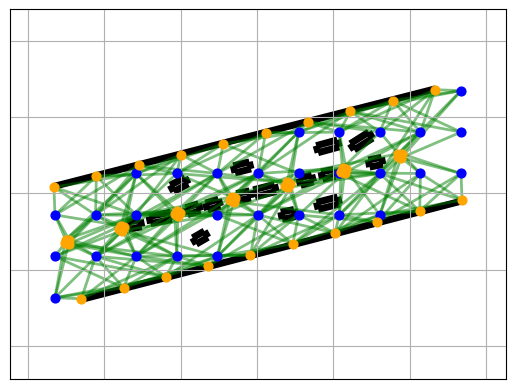

In [2]:
params = {"lidar_density": 0.1, "street_point_density": 0.1}
data = SPData().create_problem_from_glb_file(**params)

timestamp_str = datetime.now().strftime("%Y%m%d_%H%M%S")
fig = SPPlot(data).plot_problem()
fig.savefig(f"output/{timestamp_str}_problem.png")

len(data.listLidar3D)

--------------------------------------------------------------------------------
META DATA:
--------------------------------------------------------------------------------
id: 674b9921e16c143066a93841
name: None
created_date: 2024-11-30 23:00:49 (CET)
created_by: fabian.d.schatz@tum.de
modified_date: 2024-11-30 23:00:56 (CET)
modified_by: None
error_message: None
solver_job_info: None
params:
    embedding:
        chain_strength: None
        chain_break_fraction: True
        embedding_parameters:
            max_no_improvement: 10
            random_seed: None
            timeout: 1000
            max_beta: None
            tries: 10
            inner_rounds: None
            chainlength_patience: 10
            max_fill: None
            threads: 1
            return_overlap: False
            skip_initialization: False
            initial_chains: []
            fixed_chains: []
            restrict_chains: []
            suspend_chains: []
    sampling_params:
        auto_scale:

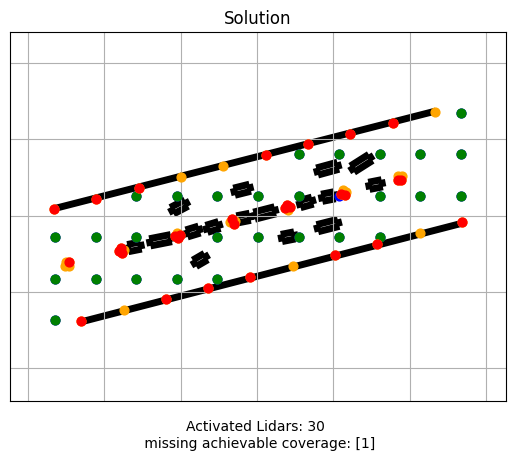

In [5]:

for i in [1]:
    timestamp_str = datetime.now().strftime("%Y%m%d_%H%M%S")
    if i == 0:
        explanation = "simulator without cut"
        # 500read
        # 1000sweep
    elif i == 1:
        explanation = "simulator with cut"
        # 500read
        # 1000sweep
    
    if explanation == "simulator without cut":
        # config = {}
        # solve_func = do_optimization
        # qubo_model_bin = SPQuboBinaryBG(data)
        # config = {"num_reads":500,"num_sweeps":1000}
        # solve_func = neal.SimulatedAnnealingSampler().sample_qubo
        # qubo_model_bin = SPQuboBinary(data, P1=0.8, P3=1)

        answer = qubo_model_bin.solve(solve_func, **config)

    elif explanation == "simulator with cut":
        pat_datas = data.partition_data()
        # merge_data = SPData().merge_data(pat_datas)
        # SPPlot(merge_data).plot_problem().savefig(f"output/{timestamp_str}_merged_problem.png")

        answer_list = []
        for data_i in pat_datas:
            config = {}
            solve_func = do_optimization
            qubo_model_bin = SPQuboBinaryBG(data_i)
            # config = {"num_reads":500,"num_sweeps":1000}
            # solve_func = neal.SimulatedAnnealingSampler().sample_qubo
            # qubo_model_bin = SPQuboBinary(data, P1=0.8, P3=1)
            answer_i = qubo_model_bin.solve(solve_func, **config)
            answer_list.append(answer_i)

        # entire evaluation
        answer_merge = {
            "solution": {}
        }

        for answer_i in answer_list:
            print(f"answer.solution = {answer_i['solution']}")
            answer_merge["solution"].update(answer_i['solution'])

    print(f"(answer_merge.solution) = {(answer_merge['solution'])}")

    evaluation = SPEvaluation(data, answer_merge["solution"])
    print(f"objective = {evaluation.get_objective()}")
    for constraint, violations in evaluation.check_solution().items():
        if len(violations) > 0:
            print(f"constraint {constraint} was violated {len(violations)} times")

    SPPlot(data, evaluation).plot_solution(hide_never_covered = True).savefig(f"output/{timestamp_str}_{explanation}_solution.png")
    